In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df=pd.read_csv(r'gdrive/My Drive/Colab Notebooks/mortality/processed_train_set.csv')

In [0]:
df.head()

,Serial_no,SUBJECT_ID,HADM_ID,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,MEAN_BP_MIN_DAY1,MEAN_BP_MAX_DAY1,MEAN_BP_MEAN_DAY1,RESP_RATE_MIN_DAY1,RESP_RATE_MAX_DAY1,RESP_RATE_MEAN_DAY1,TEMP_MIN_DAY1,TEMP_MAX_DAY1,TEMP_MEAN_DAY1,SPO2_MIN_DAY1,SPO2_MAX_DAY1,SPO2_MEAN_DAY1,GLUCOSE_MIN_DAY1,GLUCOSE_MAX_DAY1,GLUCOSE_MEAN_DAY1,HR_MIN_DAY2,HR_MAX_DAY2,HR_MEAN_DAY2,SYS_BP_MIN_DAY2,SYS_BP_MAX_DAY2,SYS_BP_MEAN_DAY2,...,Delirium/dementia/amnestic/othercognitiv,Developmentaldisorders,Disordersusuallydiagnosedininfancy/ch,ImpulsecontroldisordersNEC,Mooddisorders,Personalitydisorders,Schizophreniaandotherpsychoticdisorde,Alcohol-relateddisorders,Substance-relateddisorders,Suicideandintentionalself-inflictedin,Screeningandhistoryofmentalhealthan,Miscellaneousmentaldisorders,Viralinfect,Meningitis,Encephalitis,OthCNSinfx,Parkinson-s,Othinfectns,MS,OtheredCNS,Paralysis,Epilepsy/cnv,Headache/mig,Coma/brndmg,Cataract,Retinaldx,Glaucoma,Blindness,SexualInfxs,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn,Died
0,0,45524,108398,1,0,0,0,0,0,21.0,57.207630,108.704030,70.841980,79.847060,119.72417,94.435090,26.880910,68.876540,48.665768,37.614445,83.690080,61.041763,9.086277,24.325495,15.317726,34.627020,37.500460,37.149044,88.517360,98.391525,99.372050,134.743700,217.31165,155.57593,68.142490,100.063774,78.120926,89.537865,117.834885,101.295180,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1,1,50520,186416,1,0,1,1,0,1,39.0,79.331400,121.138664,96.915726,93.994540,138.59406,113.570206,38.621536,74.270065,66.566760,62.047737,98.244140,81.589250,8.950318,20.452858,16.422120,36.979280,37.946106,37.567726,94.895510,99.241165,98.645110,117.071846,152.38774,140.82172,89.746510,106.236690,101.622210,95.438126,145.642680,111.293490,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0
2,2,17956,126413,2,1,0,2,1,1,40.0,118.230290,175.175430,140.936700,122.862610,144.25964,134.501220,67.754650,83.301410,80.350330,76.247795,105.058030,98.625850,14.516378,39.715710,23.086393,36.951508,38.752600,38.071655,95.166626,99.261380,93.118576,108.634170,247.39170,129.60728,125.785750,174.718640,141.342070,133.556170,132.174180,131.666990,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
3,3,90258,109355,0,0,2,3,0,1,75.0,83.780380,89.188980,86.051155,111.390740,144.86057,127.681170,61.139935,75.232390,74.849920,80.639640,106.473175,93.559380,13.452833,21.236153,15.556414,36.293858,37.254100,37.034706,86.604610,96.742004,94.456890,191.599600,228.56810,228.90790,68.780624,114.619530,90.120900,92.589430,120.602905,98.316605,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0
4,4,25159,123784,0,0,1,3,2,0,55.0,60.878613,105.637500,80.616840,87.627464,127.75874,99.098860,42.693020,64.015396,64.309480,62.921795,98.436676,76.924060,8.615975,18.557594,12.778845,35.965570,36.973774,36.258358,61.632220,98.825516,99.040010,128.833010,181.92357,142.89526,56.715332,83.016860,76.610200,91.593130,117.402180,100.727165,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0


In [0]:
df=df.drop(['ADMITTIME','DISCHTIME'],axis=1)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79986 entries, 0 to 79985
Columns: 341 entries, Serial_no to Died
dtypes: float64(50), int64(291)
memory usage: 208.1 MB


In [0]:
df.describe()

,Serial_no,SUBJECT_ID,HADM_ID,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,MEAN_BP_MIN_DAY1,MEAN_BP_MAX_DAY1,MEAN_BP_MEAN_DAY1,RESP_RATE_MIN_DAY1,RESP_RATE_MAX_DAY1,RESP_RATE_MEAN_DAY1,TEMP_MIN_DAY1,TEMP_MAX_DAY1,TEMP_MEAN_DAY1,SPO2_MIN_DAY1,SPO2_MAX_DAY1,SPO2_MEAN_DAY1,GLUCOSE_MIN_DAY1,GLUCOSE_MAX_DAY1,GLUCOSE_MEAN_DAY1,HR_MIN_DAY2,HR_MAX_DAY2,HR_MEAN_DAY2,SYS_BP_MIN_DAY2,SYS_BP_MAX_DAY2,SYS_BP_MEAN_DAY2,...,Delirium/dementia/amnestic/othercognitiv,Developmentaldisorders,Disordersusuallydiagnosedininfancy/ch,ImpulsecontroldisordersNEC,Mooddisorders,Personalitydisorders,Schizophreniaandotherpsychoticdisorde,Alcohol-relateddisorders,Substance-relateddisorders,Suicideandintentionalself-inflictedin,Screeningandhistoryofmentalhealthan,Miscellaneousmentaldisorders,Viralinfect,Meningitis,Encephalitis,OthCNSinfx,Parkinson-s,Othinfectns,MS,OtheredCNS,Paralysis,Epilepsy/cnv,Headache/mig,Coma/brndmg,Cataract,Retinaldx,Glaucoma,Blindness,SexualInfxs,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn,Died
count,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,...,79986.000000,79986.0,79986.0,79986.0,79986.000000,79986.0,79986.0,79986.000000,79986.000000,79986.0,79986.000000,79986.0,79986.0,79986.0,79986.0,79986.0,79986.0,79986.0,79986.0,79986.000000,79986.000000,79986.000000,79986.0,79986.000000,79986.0,79986.000000,79986.000000,79986.0,79986.0,79986.0,79986.000000,79986.0,79986.0,79986.0,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000,79986.000000
mean,39999.928362,37929.622021,150061.087215,0.670317,0.686770,2.116908,2.305703,2.312017,0.580352,62.659203,71.648585,103.082847,86.394788,94.611491,147.788766,119.654415,45.243731,81.993277,60.837173,60.323197,104.973056,78.280311,12.558432,26.271062,18.251591,36.079021,37.553136,36.882564,92.751685,99.690078,97.522140,114.005859,173.004169,137.367501,73.869612,98.086608,85.652243,97.873648,145.891981,119.616713,...,0.013052,0.0,0.0,0.0,0.043995,0.0,0.0,0.017316,0.001663,0.0,0.107556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000138,0.000325,0.005989,0.0,0.000050,0.0,0.000013,0.000013,0.0,0.0,0.0,0.000013,0.0,0.0,0.0,0.145463,0.134173,0.008627,0.457668,0.078964,0.034969
std,23093.841072,29301.455890,29005.775227,0.949498,4.352356,2.692249,1.114078,5.836895,0.493504,18.194323,14.652305,18.478322,15.509469,16.938630,21.607343,16.484849,10.499611,16.640188,10.266585,11.917336,23.045625,10.540178,3.523310,5.868894,4.003949,1.186017,0.707464,0.593177,7.093004,1.240847,2.486509,33.953387,70.454185,42.194300,14.617449,18.976724,15.495713,17.681017,21.936564,17.079539,...,0.113499,0.0,0.0,0.0,0.205086,0.0,0.0,0.130445,0.040744,0.0,0.309821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011726,0.018027,0.077154,0.0,0.007072,0.0,0.003536,0.003536,0.0,0.0,0.0,0.003536,0.0,0.0,0.0,0.352569,0.340841,0.092478,0.498208,0.269684,0.183701
min,0.000000,3.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,18.728695,49.860610,38.503600,31.768501,91.693405,73.968796,11.334383,42.433144,30.498672,16.859703,54.782246,49.744434,2.148598,10.195258,7.600662,27.371555,34.080788,34.195652,11.555406,83.335724,65.359020,18.004930,43.617640,40.444298,26.938896,39.525543,38.878200,32.546696,86.177520,75.412330,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000

In [0]:
df=df.drop('Unnamed: 0',axis=1)

In [0]:
df.isnull().sum().sum()

0

In [0]:
df.isnull().sum()

In [0]:
df.dropna(inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79986 entries, 0 to 79985
Columns: 341 entries, Serial_no to Died
dtypes: float64(50), int64(291)
memory usage: 208.7 MB


0    77189
1     2797
Name: Died, dtype: int64

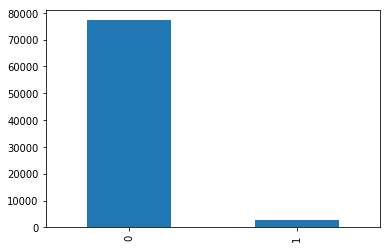

In [0]:
pd.value_counts(df['Died']).plot.bar()
df['Died'].value_counts()

In [0]:
X = np.array(df.ix[:, df.columns != 'Died'])
y = np.array(df.ix[:, df.columns == 'Died'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (79986, 340)
Shape of y: (79986, 1)


In [0]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Number transactions X_train dataset:  (63988, 340)
Number transactions y_train dataset:  (63988, 1)
Number transactions X_test dataset:  (15998, 340)
Number transactions y_test dataset:  (15998, 1)
Before OverSampling, counts of label '1': [2263]
Before OverSampling, counts of label '0': [61725]


In [0]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [0]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (123450, 340)
After OverSampling, the shape of train_y: (123450,) 

After OverSampling, counts of label '1': 61725
After OverSampling, counts of label '0': 61725


In [0]:
sm1 = SMOTEENN(random_state=2)
X_train_res1, y_train_res1 = sm1.fit_sample(X_train, y_train.ravel())

In [0]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res1.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res1.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res1==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res1==0)))

After OverSampling, the shape of train_X: (94123, 340)
After OverSampling, the shape of train_y: (94123,) 

After OverSampling, counts of label '1': 51468
After OverSampling, counts of label '0': 42655


In [0]:
sm2 = ADASYN(random_state=2)
X_train_res2, y_train_res2 = sm2.fit_sample(X_train, y_train.ravel())

In [0]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res2.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res2.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res2==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res2==0)))

After OverSampling, the shape of train_X: (123144, 340)
After OverSampling, the shape of train_y: (123144,) 

After OverSampling, counts of label '1': 61419
After OverSampling, counts of label '0': 61725


In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches


def plot_dim(x,y):
    # T-SNE Implementation
    t0 = time.time()
    X_reduced_tsne = TSNE(n_components=2, random_state=10).fit_transform(x)
    t1 = time.time()
    print("T-SNE took {:.2} s".format(t1 - t0))    

    # PCA Implementation
    t0 = time.time()
    X_reduced_pca = PCA(n_components=2, random_state=10).fit_transform(x)
    t1 = time.time()
    print("PCA took {:.2} s".format(t1 - t0))

    # TruncatedSVD
    t0 = time.time()
    X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=10).fit_transform(x)
    t1 = time.time()
    print("Truncated SVD took {:.2} s".format(t1 - t0))

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
    # labels = ['No Fraud', 'Fraud']
    f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


    blue_patch = mpatches.Patch(color='#0A0AFF', label='1')
    red_patch = mpatches.Patch(color='#AF0000', label='0')


    # t-SNE scatter plot
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='1', linewidths=2)
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='0', linewidths=2)
    ax1.set_title('t-SNE', fontsize=14)

    ax1.grid(True)

    ax1.legend(handles=[blue_patch, red_patch])


    # PCA scatter plot
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='1', linewidths=2)
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='0', linewidths=2)
    ax2.set_title('PCA', fontsize=14)

    ax2.grid(True)

    ax2.legend(handles=[blue_patch, red_patch])

    # TruncatedSVD scatter plot
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='1', linewidths=2)
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='0', linewidths=2)
    ax3.set_title('Truncated SVD', fontsize=14)

    ax3.grid(True)

    ax3.legend(handles=[blue_patch, red_patch])

    plt.show()

In [0]:
from sklearn.utils import resample
x_smote_plot,y_smote_plot=resample(X_train, y_train,n_samples=10000,random_state=0)
plot_dim(x_smote_plot,y_smote_plot)

In [0]:
sm = SMOTE(random_state=0)
x_smote, y_smote = sm.fit_sample(X_train, y_train)

T-SNE took 7.9e+01 s
PCA took 0.16 s
Truncated SVD took 0.11 s


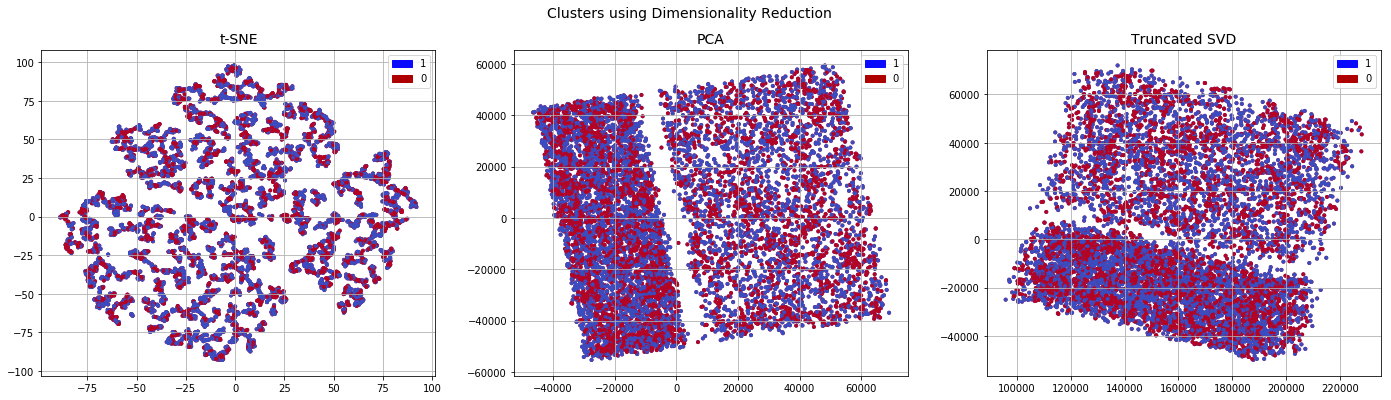

In [0]:
from sklearn.utils import resample
x_smote_plot,y_smote_plot=resample(x_smote,y_smote,n_samples=10000,random_state=0)
plot_dim(x_smote_plot,y_smote_plot)

In [0]:
from imblearn.combine import SMOTEENN
enn = SMOTEENN(random_state=0)
x_enn, y_enn = enn.fit_sample(X_train, y_train)
x_enn_plot,y_enn_plot=resample(x_enn,y_enn,n_samples=10000,random_state=0)
plot_dim(x_enn_plot,y_enn_plot)

In [0]:
sm2 = ADASYN(random_state=0)
X_train_res2, y_train_res2 = sm2.fit_sample(X_train, y_train.ravel())
x_smote_plot,y_smote_plot=resample(X_train_res1,X_train_res1,n_samples=10000,random_state=0)
plot_dim(x_smote_plot,y_smote_plot)

In [0]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler


In [0]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

In [0]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

MemoryError: ignored

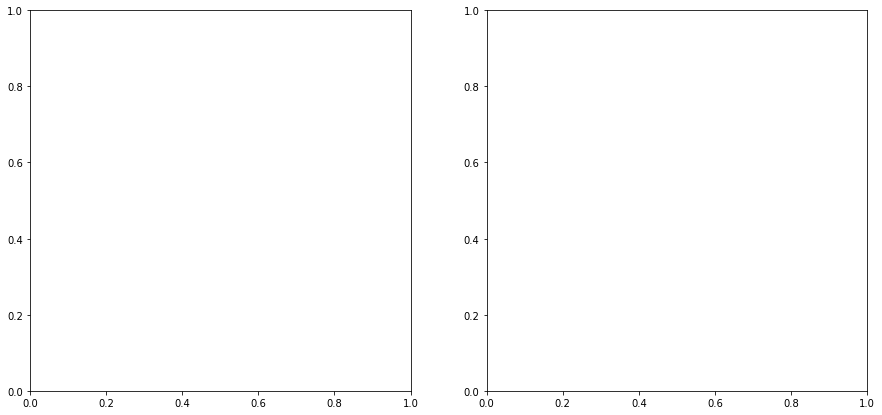

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
#X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))
clf = LinearSVC().fit(X_train, y_train)
plot_decision_function(X_train, y_train, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
pipe = make_pipeline(RandomOverSampler(random_state=0), LinearSVC())
pipe.fit(X, y)
plot_decision_function(X_train, y_train, pipe, ax2)
ax2.set_title('Decision function for RandomOverSampler')
fig.tight_layout()

In [0]:
class FakeSampler(BaseSampler):

    _sampling_type = 'bypass'

    def _fit_resample(self, X, y):
        return X, y


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
#X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))
sampler = FakeSampler()
clf = make_pipeline(sampler, LinearSVC())
plot_resampling(X_train, y_train, sampler, ax1)
ax1.set_title('Original data - y={}'.format(Counter(y)))

ax_arr = (ax2, ax3, ax4)
for ax, sampler in zip(ax_arr, (RandomOverSampler(random_state=0),
                                SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_resampling(X_train, y_train, sampler, ax)
    ax.set_title('Resampling using {}'.format(sampler.__class__.__name__))
fig.tight_layout()

In [0]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
#X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94),
                      class_sep=0.8)

ax_arr = ((ax1, ax2), (ax3, ax4))
for ax, sampler in zip(ax_arr, (SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(
        sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
fig.tight_layout()

In [0]:
pd.value_counts(y_train_res2).plot.bar()

In [0]:
from imblearn.over_sampling import SMOTENC
sm3 = SMOTENC(categorical_features=[0,1], random_state=2)
X_train_res3, y_train_res3 = sm3.fit_sample(X_train, y_train.ravel())

In [0]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res3.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res3.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res3==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res3==0)))

After OverSampling, the shape of train_X: (123450, 340)
After OverSampling, the shape of train_y: (123450,) 

After OverSampling, counts of label '1': 61725
After OverSampling, counts of label '0': 61725


In [0]:
from imblearn.over_sampling import BorderlineSMOTE
sm4 = BorderlineSMOTE(kind='borderline-1', random_state=2)
X_train_res4, y_train_res4 = sm4.fit_sample(X_train, y_train.ravel())

In [0]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res4.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res4.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res4==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res4==0)))

After OverSampling, the shape of train_X: (123450, 340)
After OverSampling, the shape of train_y: (123450,) 

After OverSampling, counts of label '1': 61725
After OverSampling, counts of label '0': 61725


In [0]:
from imblearn.over_sampling import SVMSMOTE
sm5 = SVMSMOTE(random_state=42)
X_train_res5, y_train_res5 = sm5.fit_sample(X_train, y_train.ravel())

In [0]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res5.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res5.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res5==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res5==0)))

After OverSampling, the shape of train_X: (123450, 340)
After OverSampling, the shape of train_y: (123450,) 

After OverSampling, counts of label '1': 61725
After OverSampling, counts of label '0': 61725


In [0]:
pip install xgboost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
ada =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
#ada1 =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
#ada2 =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30,60,120], 'max_features': [2, 4, 6, 8,20,40,50,60]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10,scoring='neg_mean_squared_error')
grid_search.fit()

In [0]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
model = xgb.XGBClassifier()
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier()

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)  
X_train_res = lda.fit_transform(X_train_res, y_train_res) 
X_train_res1 = lda.fit_transform(X_train_res1, y_train_res1) 
X_train_res2= lda.fit_transform(X_train_res2, y_train_res2) 
X_test = lda.transform(X_test) 

In [0]:
data_dmatrix = xgb.DMatrix(data = X_train_res, label=y_train_res)

In [0]:
model.fit(X_train_res, y_train_res)
#.fit(X_train_res2, y_train_res2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
model1.fit(X_train_res1, y_train_res1)
model2.fit(X_train_res2, y_train_res2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

y_preds1 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_preds1)
print("Smote Accuracy: %f%%"%(accuracy*100.0))

y_preds2 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_preds2)
print("Smote enn Accuracy: %f%%"%(accuracy*100.0))

y_preds3 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_preds3)
print("Adasyn Accuracy: %f%%"%(accuracy*100.0))

Smote Accuracy: 75.128141%
Smote enn Accuracy: 70.921365%
Adasyn Accuracy: 75.046881%


In [0]:
from sklearn.metrics import precision_recall_curve
precisions1, recalls1, thresholds1 = precision_recall_curve(y_test, y_preds1)
precisions2, recalls2, thresholds2 = precision_recall_curve(y_test, y_preds2)
precisions3, recalls3, thresholds3 = precision_recall_curve(y_test, y_preds3)

In [0]:
def plot_precision_recall_vs_threshold(precisions1, recalls1, thresholds1):
  plt.plot(thresholds, precisions1[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls1[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])

In [0]:
def plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2):
  plt.plot(thresholds, precisions2[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls2[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])

In [0]:
def plot_precision_recall_vs_threshold(precisions3, recalls3, thresholds3):
  plt.plot(thresholds, precisions3[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls3[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])

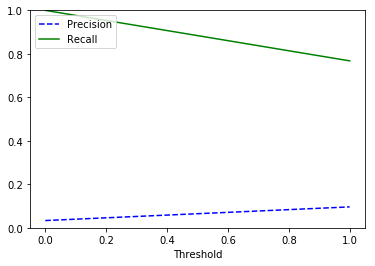

In [0]:
plot_precision_recall_vs_threshold(precisions1, recalls1, thresholds1)
plt.show()

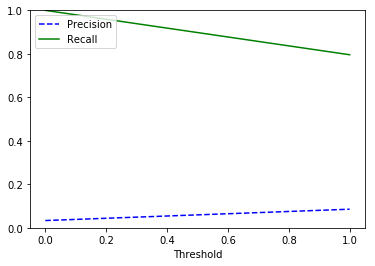

In [0]:
plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2)
plt.show()

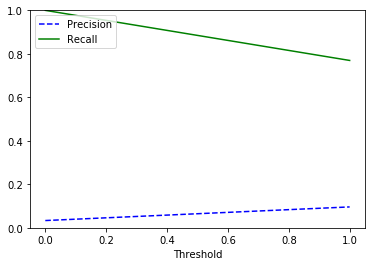

In [0]:
plot_precision_recall_vs_threshold(precisions3, recalls3, thresholds3)
plt.show()

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds1)

In [0]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_preds1))
print(roc_auc_score(y_test, y_preds2))
print(roc_auc_score(y_test, y_preds3))

0.7592507958559301
0.7510505249839666
0.759734461191488


In [0]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')


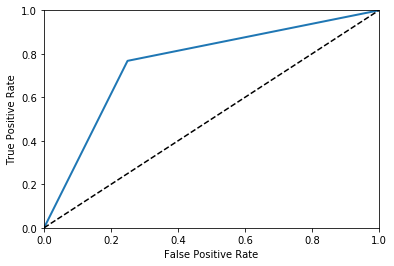

In [0]:
plot_roc_curve(fpr, tpr)
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
pred = clf.predict(X_test)

In [0]:
metrics.accuracy_score(y_test, pred)

0.7257520066011552

In [0]:
x=df.astype(float).corr()

In [0]:
print(x)

In [0]:
y=x.sum(axis=1)

In [0]:
my_submission = pd.DataFrame(y_preds)

In [0]:
my_submission.head()

,0
0,0
1,0
2,0
3,0
4,0


In [0]:
my_submission.to_csv('solution_random.csv')

In [0]:
df=pd.read_csv(r'gdrive/My Drive/Colab Notebooks/mortality/test_set.csv')

In [0]:
df=df.iloc[0:20001,:]

In [0]:
import 

In [0]:
T = np.array(df)

In [0]:
T.shape

(20001, 340)

In [0]:
T = lda.transform(T)

In [0]:
y_preds = ada.predict(T)

In [0]:
y_preds1 = model1.predict(T)

In [0]:
y_preds2 = model2.predict(T)

In [0]:
y_preds = clf.predict(T)

In [0]:
j=0
for i in y_preds:
  if i==1:
    j+=1
print (j)

0


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:340]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=250)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(250,'Score'))  #print 10 best features

In [0]:
df.select_dtypes(include=['object'])

In [0]:
df['GLUCOSE_MEAN_DAY2']=df['GLUCOSE_MEAN_DAY2'].astype('Float64')

In [0]:
df=df.drop('ADMITTIME',axis=1)
df=df.drop('DISCHTIME',axis=1)

In [0]:
#pd.value_counts(df['LANGUAGE']).plot.bar()
df['ICU'].value_counts()

MICU     6940
CSRU     4235
SICU     3280
CCU      2903
TSICU    2643
Name: ICU, dtype: int64

In [0]:
dic= {
		"Medicare" : 0,
		"Private" : 1,
		"Medicaid" : 2,
		"Government" : 3,
		"Self_Pay" : 4
	}

In [0]:
df['INSURANCE']=df.INSURANCE.map(dic)

0    11250
1     5896
2     1585
3      721
4      549
Name: INSURANCE, dtype: int64

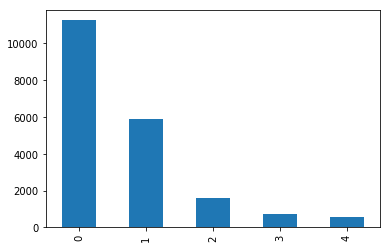

In [0]:
pd.value_counts(df['INSURANCE']).plot.bar()
df['INSURANCE'].value_counts()

In [0]:
x=df.LANGUAGE.unique()

In [0]:
dic= {}
j=0
for i in x:
  dic[i]=j
  j+=1

In [0]:
df['LANGUAGE']=df.LANGUAGE.map(dic)

In [0]:
x=df.RELIGION.unique()

In [0]:
dic= {}
j=0
for i in x:
  dic[i]=j
  j+=1

In [0]:
df['RELIGION']=df.RELIGION.map(dic)

In [0]:
x=df.MARITAL_STATUS.unique()

In [0]:
dic= {}
j=0
for i in x:
  dic[i]=j
  j+=1

In [0]:
df['MARITAL_STATUS']=df.MARITAL_STATUS.map(dic)

In [0]:
x=df.ETHNICITY.unique()

In [0]:
dic= {}
j=0
for i in x:
  dic[i]=j
  j+=1

In [0]:
df['ETHNICITY']=df.ETHNICITY.map(dic)

In [0]:
x=df.GENDER.unique()

In [0]:
dic= {}
j=0
for i in x:
  dic[i]=j
  j+=1

In [0]:
df['GENDER']=df.GENDER.map(dic)

In [0]:
x=df.ICU.unique()

In [0]:
dic= {}
j=0
for i in x:
  dic[i]=j
  j+=1

In [0]:
df['ICU']=df.ICU.map(dic)

In [0]:
df.to_csv('processed_test_set.csv')

In [0]:
df['ICU']

In [0]:
import shutil
shutil.move("processed_test_set.csv", "gdrive/My Drive/Colab Notebooks/mortality")

'gdrive/My Drive/Colab Notebooks/mortality/processed_test_set.csv'